In [6]:
import spectral
import numpy as np
import os

In [2]:
# Load hyperspectral datacube
dat_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11.dat'
hdr_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11.dat.hdr'

cube = spectral.open_image(hdr_file).load()  # Load datacube as a numpy array

# Load mask
mask_file = 'E:/Unzipped/HSI_Butterfly_Species/datacube/AO/cube 2/espece7_acq11_mask.npy'
mask = np.load(mask_file)

In [3]:
# Ensure the mask has the same spatial dimensions as the datacube
if mask.shape != cube.shape[:2]:
    
    raise ValueError("Mask dimensions do not match the datacube spatial dimensions.")

# Apply the mask: Set values outside the mask to zero
masked_cube = cube * mask[:, :, np.newaxis]

In [4]:
# Define output file paths
output_bil = 'espece7_acq11_masked.bil'
output_hdr = 'espece7_acq11_masked.bil.hdr'

# Save masked datacube
spectral.envi.save_image(output_hdr, masked_cube, interleave='bil', force=True)

print(f"Masked datacube saved as {output_bil} and {output_hdr}")

Masked datacube saved as espece7_acq11_masked.bil and espece7_acq11_masked.bil.hdr


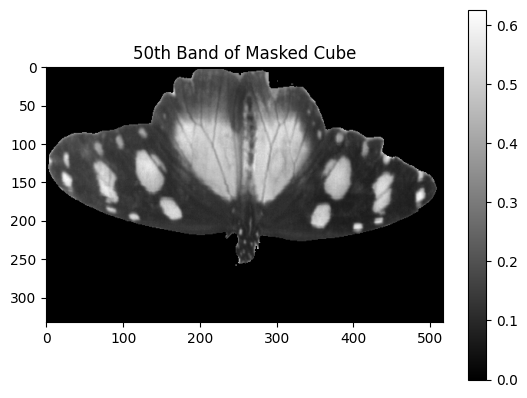

In [5]:
# Load the saved masked datacube
masked_cube_reloaded = spectral.open_image(output_hdr).load()

# Visualize an example band
import matplotlib.pyplot as plt
plt.imshow(masked_cube_reloaded[:, :, 50], cmap='gray')
plt.title("50th Band of Masked Cube")
plt.colorbar()
plt.show()

In [7]:
# Define the root directories for input and output
input_root = 'E:/Unzipped/HSI_Butterfly_Species/datacube'
output_root = 'masked_datacube'

# Function to apply mask and save as .bil
def process_file(dat_file, mask_file, output_dir):
    
    try:
        
        # Load the datacube
        hdr_file = dat_file + '.hdr'
        cube = spectral.open_image(hdr_file).load()

        # Load the mask
        mask = np.load(mask_file)

        # Check if mask dimensions match the cube
        if mask.shape != cube.shape[:2]:
            raise ValueError(f"Mask dimensions {mask.shape} do not match datacube dimensions {cube.shape[:2]} for {dat_file}")

        # Apply the mask
        masked_cube = cube * mask[:, :, np.newaxis]

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Define output paths
        base_name = os.path.splitext(os.path.basename(dat_file))[0]
        output_hdr = os.path.join(output_dir, base_name + '.bil.hdr')
        output_bil = os.path.join(output_dir, base_name + '.bil')

        # Save the masked cube as ENVI .bil format
        spectral.envi.save_image(output_hdr, masked_cube, interleave='bil', force=True)
        print(f"Processed and saved: {output_bil}")
        
    except Exception as e:
        
        print(f"Error processing {dat_file}: {e}")



# Traverse the input directory structure
for root, dirs, files in os.walk(input_root):
    
    for file in files:
        
        if file.endswith('.dat'):  # Find .dat files
            
            # Build paths for dat file and corresponding mask
            dat_file = os.path.join(root, file)
            mask_file = dat_file.replace('.dat', '_mask.npy')  # Assume masks follow this naming convention

            # Define the output directory structure
            relative_path = os.path.relpath(root, input_root)  # Get relative path from input root
            output_dir = os.path.join(output_root, relative_path)

            # Process the file
            process_file(dat_file, mask_file, output_dir)

Processed and saved: masked_datacube\AE\cube 1\espece10_acq1.bil
Processed and saved: masked_datacube\AE\cube 2\espece10_acq4.bil
Processed and saved: masked_datacube\AO\cube 1\espece7_acq10.bil
Processed and saved: masked_datacube\AO\cube 2\espece7_acq11.bil
Processed and saved: masked_datacube\DC\cube 1\espece4_acq4.bil
Processed and saved: masked_datacube\DC\cube 2\espece4_acq6.bil
Processed and saved: masked_datacube\HM\cube 1\espece1_acq4.bil
Processed and saved: masked_datacube\HM\cube 2\espece1_acq3.bil
